<a href="https://colab.research.google.com/github/Collin-Campbell/BuildWeek1/blob/master/Collin_BuildWeek_Unit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pulled data from Kaggle:
# https://www.kaggle.com/open-powerlifting/powerlifting-database

import pandas as pd
import numpy as np

df = pd.read_csv('openpowerlifting.csv')

print(df.shape)
df.head()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1423354, 37)


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,92.5,105.0,NaN,105.0,45.0,50.0,55.0,NaN,55.0,110.0,120.0,130.0,NaN,130.0,290.0,4,324.16,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,110.0,120.0,NaN,120.0,55.0,62.5,67.5,NaN,67.5,130.0,140.0,145.0,NaN,145.0,332.5,2,378.07,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,NaN,NaN,NaN,NaN,27.5,32.5,-35.0,NaN,32.5,NaN,NaN,NaN,NaN,NaN,32.5,1,38.56,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,-105.0,105.0,NaN,105.0,67.5,72.5,-75.0,NaN,72.5,132.5,-140.0,-140.0,NaN,132.5,310.0,3,345.61,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,130.0,140.0,NaN,140.0,70.0,75.0,80.0,NaN,80.0,150.0,160.0,170.0,NaN,170.0,390.0,3,321.25,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [3]:
# Checking for NaN values.

df.isnull().sum()

Name                     0
Sex                      0
Event                    0
Equipment                0
Age                 665827
AgeClass            636554
Division              8178
BodyweightKg         16732
WeightClassKg        13312
Squat1Kg           1085774
Squat2Kg           1090005
Squat3Kg           1099512
Squat4Kg           1419658
Best3SquatKg        391904
Bench1Kg            923575
Bench2Kg            929868
Bench3Kg            944869
Bench4Kg           1413849
Best3BenchKg        147173
Deadlift1Kg        1059810
Deadlift2Kg        1067331
Deadlift3Kg        1083407
Deadlift4Kg        1414108
Best3DeadliftKg     341546
TotalKg             110170
Place                    0
Wilks               118947
McCulloch           119100
Glossbrenner        118947
IPFPoints           150068
Tested              329462
Country            1034470
Federation               0
Date                     0
MeetCountry              0
MeetState           481809
MeetName                 0
d

In [4]:
df = df.drop(['Name', 'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 
              'Squat3Kg', 'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 
              'Bench3Kg', 'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 
              'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg', 'Best3DeadliftKg', 
              'TotalKg', 'Place', 'McCulloch', 'Glossbrenner', 'IPFPoints', 
              'Tested', 'Country'], axis=1)

# Dropped unneeded columns and columns with NaNs.

In [5]:
df.head()

,Sex,Event,Equipment,Age,AgeClass,Division,Wilks,Federation,Date,MeetCountry,MeetState,MeetName
0,F,SBD,Wraps,29.0,24-34,F-OR,324.16,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,F,SBD,Wraps,29.0,24-34,F-OR,378.07,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,F,B,Raw,40.0,40-44,F-OR,38.56,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,F,SBD,Wraps,23.0,20-23,F-OR,345.61,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,F,SBD,Wraps,45.0,45-49,F-OR,321.25,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [6]:
df = df.dropna()

# Dropped all rows with NaN values.

In [7]:
df.isnull().sum()

Sex            0
Event          0
Equipment      0
Age            0
AgeClass       0
Division       0
Wilks          0
Federation     0
Date           0
MeetCountry    0
MeetState      0
MeetName       0
dtype: int64

In [8]:
# Dropping all rows that are not SBD for Event.
# SBD stands for Squat, Bench and Deadlift.  Considering that all of these
# values go into calculating the Wilks coefficient, I don't want somebody
# who only did Bench and has a low Wilks score being included in my data.

df = df[df.Event == 'SBD']

In [9]:
df = df.reset_index(drop=True)

In [10]:
print(df.shape)
df.head()

# Data is cleaned.

(273373, 12)


,Sex,Event,Equipment,Age,AgeClass,Division,Wilks,Federation,Date,MeetCountry,MeetState,MeetName
0,F,SBD,Wraps,29.0,24-34,F-OR,324.16,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,F,SBD,Wraps,29.0,24-34,F-OR,378.07,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,F,SBD,Wraps,23.0,20-23,F-OR,345.61,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,F,SBD,Wraps,45.0,45-49,F-OR,321.25,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,F,SBD,Wraps,37.0,35-39,F-OR,354.74,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [11]:
# Research question: 
# Due to a combination of equatorial bulge and the effects of the surface
# centrifugal force due to Earth's rotation, we know that gravity is stronger
# at the poles than at the Equator.  With this in mind, do power-
# lifters benefit from this information?  Meaning, are they able to lift 
# more (and score better) at locations closer to the Equator?

In [12]:
df['MeetCountry'].value_counts()

USA            223631
Australia       21520
Canada          13329
New Zealand      6715
Germany          4833
Russia           2743
Netherlands       271
Mexico            153
India             118
Brazil             60
Name: MeetCountry, dtype: int64

In [13]:
df['MeetState'].value_counts()

TX     36912
CA     28048
FL     15164
OH     10546
PA      8864
       ...  
SH        10
JA         9
ZE         7
GR         4
TKI        2
Name: MeetState, Length: 109, dtype: int64

In [14]:
test_df = df.copy()

In [15]:
pd.set_option('display.max_rows', None)

test_df.groupby(['MeetCountry', 'MeetState']).size().reset_index(name='Counts')

# 116 total different meet locations.  I need to add a column for each location:
# Distance from Equator.

,MeetCountry,MeetState,Counts
0,Australia,ACT,814
1,Australia,NSW,4985
2,Australia,NT,166
3,Australia,QLD,5490
4,Australia,SA,543
5,Australia,TAS,625
6,Australia,VIC,6706
7,Australia,WA,2191
8,Brazil,SP,60
9,Canada,AB,2098


In [16]:
# Creating a function that will add whether a country is in the 
# Northern or Southern Hemisphere.  (Might use this later)

def n_or_s(df):
  if df['MeetCountry'] == 'Australia':
    return 'S'
  if df['MeetCountry'] == 'Brazil':
    return 'S'
  if df['MeetCountry'] == 'Canada':
    return 'N'
  if df['MeetCountry'] == 'Germany':
    return 'N'
  if df['MeetCountry'] == 'India':
    return 'N'
  if df['MeetCountry'] == 'Mexico':
    return 'N'
  if df['MeetCountry'] == 'Netherlands':
    return 'N'
  if df['MeetCountry'] == 'New Zealand':
    return 'S'
  if df['MeetCountry'] == 'Russia':
    return 'N'
  if df['MeetCountry'] == 'USA':
    return 'N'
  else: 
    return 'NaN'

In [17]:
# Adding this column to my dataframe.

df['N_or_S'] = df.apply(n_or_s, axis=1)

In [18]:
print(df.shape)
df.head()

(273373, 13)


,Sex,Event,Equipment,Age,AgeClass,Division,Wilks,Federation,Date,MeetCountry,MeetState,MeetName,N_or_S
0,F,SBD,Wraps,29.0,24-34,F-OR,324.16,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S
1,F,SBD,Wraps,29.0,24-34,F-OR,378.07,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S
2,F,SBD,Wraps,23.0,20-23,F-OR,345.61,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S
3,F,SBD,Wraps,45.0,45-49,F-OR,321.25,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S
4,F,SBD,Wraps,37.0,35-39,F-OR,354.74,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S


In [19]:
df.isnull().sum()

Sex            0
Event          0
Equipment      0
Age            0
AgeClass       0
Division       0
Wilks          0
Federation     0
Date           0
MeetCountry    0
MeetState      0
MeetName       0
N_or_S         0
dtype: int64

In [20]:
# Creating a function that will add the latitude (in degrees, rounded to the 
# nearest whole integer) to each meet location based on country and state.  
# Had to do this manually (unfortunately). 

def latitude(df):

# Australia
  if (df['MeetCountry'] == 'Australia' and df['MeetState'] == 'ACT'):
    return 35
  if (df['MeetCountry'] == 'Australia' and df['MeetState'] == 'NSW'):
    return 31
  if (df['MeetCountry'] == 'Australia' and df['MeetState'] == 'NT'):
    return 20
  if (df['MeetCountry'] == 'Australia' and df['MeetState'] == 'QLD'):
    return 21
  if (df['MeetCountry'] == 'Australia' and df['MeetState'] == 'SA'):
    return 30
  if (df['MeetCountry'] == 'Australia' and df['MeetState'] == 'TAS'):
    return 41
  if (df['MeetCountry'] == 'Australia' and df['MeetState'] == 'VIC'):
    return 37
  if (df['MeetCountry'] == 'Australia' and df['MeetState'] == 'WA'):
    return 28

# Brazil
  if (df['MeetCountry'] == 'Brazil' and df['MeetState'] == 'SP'):
    return 24

# Canada
  if (df['MeetCountry'] == 'Canada' and df['MeetState'] == 'AB'):
    return 54
  if (df['MeetCountry'] == 'Canada' and df['MeetState'] == 'BC'):
    return 54
  if (df['MeetCountry'] == 'Canada' and df['MeetState'] == 'MB'):
    return 54
  if (df['MeetCountry'] == 'Canada' and df['MeetState'] == 'NB'):
    return 47
  if (df['MeetCountry'] == 'Canada' and df['MeetState'] == 'NL'):
    return 53
  if (df['MeetCountry'] == 'Canada' and df['MeetState'] == 'NS'):
    return 45
  if (df['MeetCountry'] == 'Canada' and df['MeetState'] == 'PE'):
    return 47
  if (df['MeetCountry'] == 'Canada' and df['MeetState'] == 'ON'):
    return 56
  if (df['MeetCountry'] == 'Canada' and df['MeetState'] == 'QC'):
    return 47
  if (df['MeetCountry'] == 'Canada' and df['MeetState'] == 'SK'):
    return 53

# Germany
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'BB'):
    return 52
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'BE'):
    return 53
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'BW'):
    return 49
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'BY'):
    return 49
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'HE'):
    return 51
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'HH'):
    return 54
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'MV'):
    return 54
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'NI'):
    return 53
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'NW'):
    return 51
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'RP'):
    return 50
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'SH'):
    return 54
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'SN'):
    return 51
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'ST'):
    return 52
  if (df['MeetCountry'] == 'Germany' and df['MeetState'] == 'TH'):
    return 51
  
# India
  if (df['MeetCountry'] == 'India' and df['MeetState'] == 'DL'):
    return 29
  if (df['MeetCountry'] == 'India' and df['MeetState'] == 'MH'):
    return 20
  if (df['MeetCountry'] == 'India' and df['MeetState'] == 'WB'):
    return 23

# Mexico
  if (df['MeetCountry'] == 'Mexico' and df['MeetState'] == 'BC'):
    return 31
  if (df['MeetCountry'] == 'Mexico' and df['MeetState'] == 'CH'):
    return 29
  if (df['MeetCountry'] == 'Mexico' and df['MeetState'] == 'CO'):
    return 27
  if (df['MeetCountry'] == 'Mexico' and df['MeetState'] == 'DF'):
    return 19
  if (df['MeetCountry'] == 'Mexico' and df['MeetState'] == 'GT'):
    return 21
  if (df['MeetCountry'] == 'Mexico' and df['MeetState'] == 'HG'):
    return 20
  if (df['MeetCountry'] == 'Mexico' and df['MeetState'] == 'JA'):
    return 21
  if (df['MeetCountry'] == 'Mexico' and df['MeetState'] == 'SI'):
    return 25

# Netherlands
  if (df['MeetCountry'] == 'Netherlands' and df['MeetState'] == 'GE'):
    return 52
  if (df['MeetCountry'] == 'Netherlands' and df['MeetState'] == 'GR'):
    return 53
  if (df['MeetCountry'] == 'Netherlands' and df['MeetState'] == 'NB'):
    return 51
  if (df['MeetCountry'] == 'Netherlands' and df['MeetState'] == 'NH'):
    return 53
  if (df['MeetCountry'] == 'Netherlands' and df['MeetState'] == 'ZE'):
    return 51
  if (df['MeetCountry'] == 'Netherlands' and df['MeetState'] == 'ZH'):
    return 52

# New Zealand
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'AKL'):
    return 37
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'BOP'):
    return 37
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'CAN'):
    return 44
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'GIS'):
    return 39
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'HKB'):
    return 40
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'MWT'):
    return 40
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'NTL'):
    return 35
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'OTA'):
    return 45
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'STL'):
    return 46
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'TAS'):
    return 41
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'TKI'):
    return 39
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'WGN'):
    return 41
  if (df['MeetCountry'] == 'New Zealand' and df['MeetState'] == 'WKO'):
    return 38

# Russia
  if (df['MeetCountry'] == 'Russia' and df['MeetState'] == 'ME'):
    return 56
  if (df['MeetCountry'] == 'Russia' and df['MeetState'] == 'MOW'):
    return 56

# USA
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'AK'):
    return 64
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'AL'):
    return 32
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'AR'):
    return 35
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'AZ'):
    return 34
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'CA'):
    return 37
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'CO'):
    return 40
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'CT'):
    return 42
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'DC'):
    return 39
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'DE'):
    return 39
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'FL'):
    return 28
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'GA'):
    return 32
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'HI'):
    return 20
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'IA'):
    return 42
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'ID'):
    return 44
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'IL'):
    return 41
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'IN'):
    return 41
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'KS'):
    return 39
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'KY'):
    return 38
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'LA'):
    return 31
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'MA'):
    return 42
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'MD'):
    return 39
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'ME'):
    return 45
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'MI'):
    return 44
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'MN'):
    return 47
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'MO'):
    return 38
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'MS'):
    return 32
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'MT'):
    return 47
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'NC'):
    return 36
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'ND'):
    return 48
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'NE'):
    return 41
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'NH'):
    return 43
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'NJ'):
    return 40
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'NM'):
    return 35
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'NV'):
    return 39
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'NY'):
    return 43
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'OH'):
    return 40
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'OK'):
    return 35
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'OR'):
    return 44
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'PA'):
    return 41
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'RI'):
    return 42
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'SC'):
    return 34
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'SD'):
    return 44
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'TN'):
    return 36
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'TX'):
    return 32
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'UT'):
    return 39
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'VA'):
    return 37
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'VT'):
    return 45
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'WA'):
    return 48
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'WI'):
    return 44
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'WV'):
    return 39
  if (df['MeetCountry'] == 'USA' and df['MeetState'] == 'WY'):
    return 43

# Other
  else: 
    return 'NaN'

In [21]:
# Adding this column to my dataframe.

df['Latitude'] = df.apply(latitude, axis=1)

In [22]:
df.isnull().sum()

Sex            0
Event          0
Equipment      0
Age            0
AgeClass       0
Division       0
Wilks          0
Federation     0
Date           0
MeetCountry    0
MeetState      0
MeetName       0
N_or_S         0
Latitude       0
dtype: int64

In [23]:
print(df.shape)
df.head()

(273373, 14)


,Sex,Event,Equipment,Age,AgeClass,Division,Wilks,Federation,Date,MeetCountry,MeetState,MeetName,N_or_S,Latitude
0,F,SBD,Wraps,29.0,24-34,F-OR,324.16,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
1,F,SBD,Wraps,29.0,24-34,F-OR,378.07,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
2,F,SBD,Wraps,23.0,20-23,F-OR,345.61,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
3,F,SBD,Wraps,45.0,45-49,F-OR,321.25,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
4,F,SBD,Wraps,37.0,35-39,F-OR,354.74,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37


In [28]:
df['Equipment'].value_counts()

Raw           159162
Single-ply     57605
Wraps          47162
Multi-ply       9444
Name: Equipment, dtype: int64

In [29]:
# Decided to keep only rows in which no equipment was used ('Raw' values).
# Using some forms of equipment could allow some powerlifters to lift 
# heavier weights and, thus, skew my results.

df = df[df.Equipment == 'Raw']

In [31]:
print(df.shape)
df.head()

(159162, 14)


,Sex,Event,Equipment,Age,AgeClass,Division,Wilks,Federation,Date,MeetCountry,MeetState,MeetName,N_or_S,Latitude
10,F,SBD,Raw,27.0,24-34,F-OR,333.24,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
13,F,SBD,Raw,19.0,18-19,F-OR,290.95,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
18,F,SBD,Raw,31.0,24-34,F-OR,353.56,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
20,F,SBD,Raw,29.0,24-34,F-OR,294.98,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
30,F,SBD,Raw,28.0,24-34,F-OR,284.47,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37


In [32]:
import matplotlib.pyplot as plt

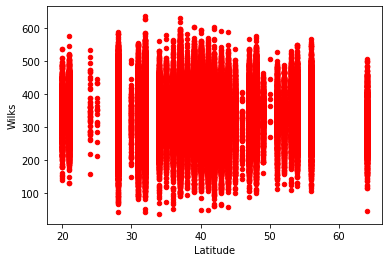

In [33]:
df.plot(kind='scatter',x='Latitude',y='Wilks',color='red')
plt.show()

In [34]:
df.corr()

# A very weak (-0.044) negative linear relationship between Latitude vs. Wilks.
# Because the value is within -0.1 to 0.1, could say that there is no linear 
# relationship present between the two variables.   

,Age,Wilks,Latitude
Age,1.000000,-0.122928,0.01971
Wilks,-0.122928,1.000000,-0.04422
Latitude,0.019710,-0.044220,1.00000


In [35]:
# Creating a dataframe to find the average Wilks score at each Latitude.

Lat_Wilks_df = df.groupby('Latitude', as_index=False).Wilks.mean()

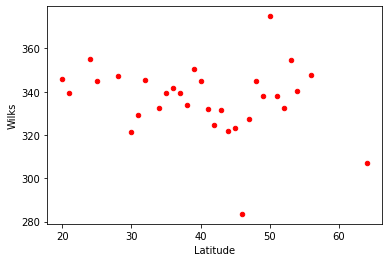

In [36]:
Lat_Wilks_df.plot(kind='scatter',x='Latitude',y='Wilks',color='red')
plt.show()

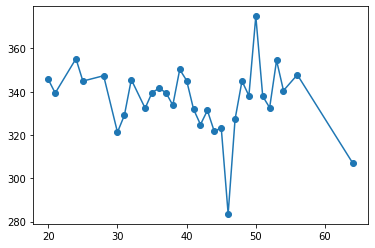

In [37]:
plt.plot(Lat_Wilks_df['Latitude'], Lat_Wilks_df['Wilks'], '-o')
plt.show()

In [ ]:
# The Wilks scoring system has recieved criticism for having some
# gender and age bias associated with its calculation.  Maybe there 
# will be more correlation by looking at only subsets of these variables. 

In [39]:
#Creating a dataframe with only males (as there are more datapoints for this
# gender).

M_only_df = df[df.Sex == 'M']

In [40]:
print(M_only_df.shape)
M_only_df.head()

(103057, 14)


,Sex,Event,Equipment,Age,AgeClass,Division,Wilks,Federation,Date,MeetCountry,MeetState,MeetName,N_or_S,Latitude
39,M,SBD,Raw,80.0,80-999,M-OR,213.32,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
47,M,SBD,Raw,31.0,24-34,M-OR,312.17,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
52,M,SBD,Raw,21.0,20-23,M-OR,329.21,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
70,M,SBD,Raw,27.0,24-34,M-OR,414.47,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
79,M,SBD,Raw,72.0,70-74,M-OR,231.12,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37


In [41]:
# Correlation is a bit stronger at -0.054.

M_only_df.corr()

,Age,Wilks,Latitude
Age,1.000000,-0.083014,0.011803
Wilks,-0.083014,1.000000,-0.054291
Latitude,0.011803,-0.054291,1.000000


In [43]:
# Let's now narrow in on males within the most popular age class
# (24-34).

M_only_and_age_df = M_only_df[M_only_df.AgeClass == '24-34']

In [45]:
print(M_only_and_age_df.shape)
M_only_and_age_df.head()

(38354, 14)


,Sex,Event,Equipment,Age,AgeClass,Division,Wilks,Federation,Date,MeetCountry,MeetState,MeetName,N_or_S,Latitude
47,M,SBD,Raw,31.0,24-34,M-OR,312.17,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
70,M,SBD,Raw,27.0,24-34,M-OR,414.47,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,S,37
348,M,SBD,Raw,24.0,24-34,M-OR,318.17,GPC-AUS,2019-03-24,Australia,ACT,ACT States,S,35
355,M,SBD,Raw,24.0,24-34,M-OR,409.42,GPC-AUS,2019-03-24,Australia,ACT,ACT States,S,35
393,M,SBD,Raw,26.0,24-34,M-OR,384.87,GPC-AUS,2017-09-09,Australia,VIC,Melbourne Cup,S,37


In [46]:
# Correlation remains even weaker (-0.019).  

M_only_and_age_df.corr()

,Age,Wilks,Latitude
Age,1.000000,-0.018238,0.007666
Wilks,-0.018238,1.000000,-0.018749
Latitude,0.007666,-0.018749,1.000000


In [49]:
# The Earth is tilted, maybe that is skewing results.  Let's look
# at only values in the Northern Hemisphere (with the most datapoints).

M_only_and_age_and_N_df = M_only_and_age_df[M_only_and_age_df.N_or_S == 'N']

In [50]:
print(M_only_and_age_and_N_df.shape)
M_only_and_age_and_N_df.head()

(34177, 14)


,Sex,Event,Equipment,Age,AgeClass,Division,Wilks,Federation,Date,MeetCountry,MeetState,MeetName,N_or_S,Latitude
5939,M,SBD,Raw,25.0,24-34,Open,400.12,BVDK,2018-09-08,Germany,MV,LM Mecklenburg-Vorpommern KDK,N,54
5941,M,SBD,Raw,31.5,24-34,Open,401.40,BVDK,2018-09-08,Germany,MV,LM Mecklenburg-Vorpommern KDK,N,54
5942,M,SBD,Raw,26.5,24-34,Open,346.40,BVDK,2018-09-08,Germany,MV,LM Mecklenburg-Vorpommern KDK,N,54
5949,M,SBD,Raw,25.5,24-34,Open,296.28,BVDK,2018-09-08,Germany,MV,LM Mecklenburg-Vorpommern KDK,N,54
6007,M,SBD,Raw,28.0,24-34,Open,368.35,BVDK,2017-04-29,Germany,BY,LM Bayern KDK Aktive,N,49


In [51]:
# Correlation is not present.

M_only_and_age_and_N_df.corr()

,Age,Wilks,Latitude
Age,1.000000,-0.017134,0.020130
Wilks,-0.017134,1.000000,-0.027409
Latitude,0.020130,-0.027409,1.000000


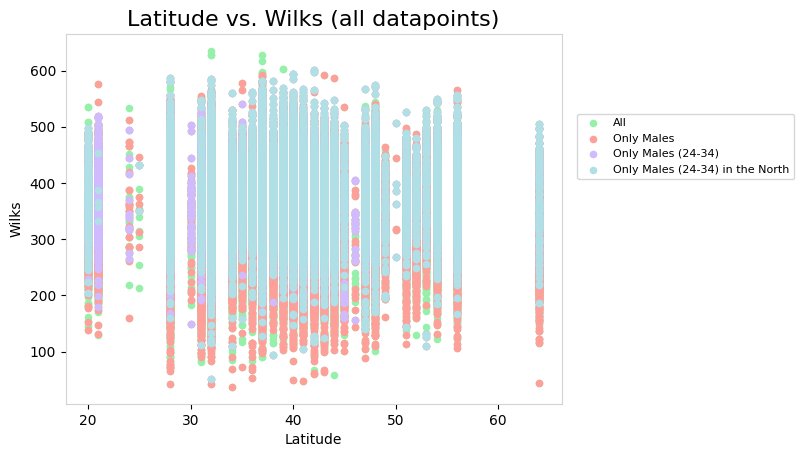

In [159]:
#Plot all together:

ax = df.plot(kind='scatter',x='Latitude',y='Wilks',color='C1') #green


M_only_df.plot(kind='scatter',x='Latitude',y='Wilks',color='C2', ax=ax) #red

M_only_and_age_df.plot(kind='scatter',x='Latitude',y='Wilks',color='C3', ax=ax) #purple

M_only_and_age_and_N_df.plot(kind='scatter',x='Latitude',y='Wilks',color='C5', ax=ax) #blue

ax.set_title(x=0.5, y=1.0, label='Latitude vs. Wilks (all datapoints)', fontsize=16,)

ax.spines['top'].set_color('lightgrey')
ax.spines['right'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')
ax.spines['bottom'].set_color('lightgrey')

ax.legend(['All', 'Only Males', 'Only Males (24-34)', 'Only Males (24-34) in the North'], 
          loc='upper center', bbox_to_anchor=(1.25, 0.8), fontsize=8)

plt.style.use('seaborn-pastel')
plt.show()

In [73]:
# Lat_Wilks_df = df.groupby('Latitude', as_index=False).Wilks.mean()

Lat_Wilks_df_M = M_only_df.groupby('Latitude', as_index=False).Wilks.mean()

Lat_Wilks_df_M_age = M_only_and_age_df.groupby('Latitude', as_index=False).Wilks.mean()

Lat_Wilks_df_M_age_N = M_only_and_age_and_N_df.groupby('Latitude', as_index=False).Wilks.mean()

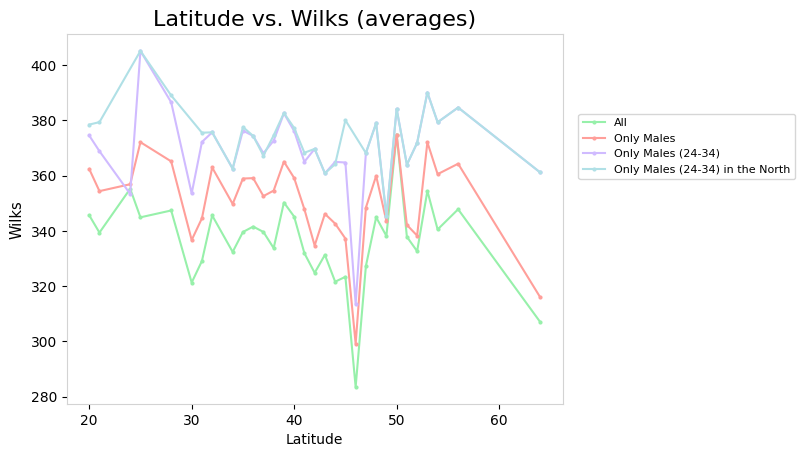

In [160]:
ax = Lat_Wilks_df.plot.line(x='Latitude',y='Wilks', color='C1', marker='o', markersize='2')

Lat_Wilks_df_M.plot.line(x='Latitude',y='Wilks', color='C2', marker='o', markersize='2', ax=ax)

Lat_Wilks_df_M_age.plot.line(x='Latitude',y='Wilks', color='C3', marker='o', markersize='2', ax=ax)

Lat_Wilks_df_M_age_N.plot.line(x='Latitude',y='Wilks', color='C5', marker='o', markersize='2', ax=ax)

ax.legend(['All', 'Only Males', 'Only Males (24-34)', 'Only Males (24-34) in the North'], fontsize=8)

ax.spines['top'].set_color('lightgrey')
ax.spines['right'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')
ax.spines['bottom'].set_color('lightgrey')

ax.set_ylabel('Wilks', fontsize=10.5)

ax.set_title(x=0.5, y=1.0, label='Latitude vs. Wilks (averages)', fontsize=16,)

ax.legend(['All', 'Only Males', 'Only Males (24-34)', 'Only Males (24-34) in the North'], 
          loc='upper center', bbox_to_anchor=(1.25, 0.8), fontsize=8)

plt.show()